In [127]:
import gtfs_kit as gk
import os.path
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
# import gtfs_kit_scissors

In [45]:
gtfs_dir = "../../data/raw/delfi/"
dates = [20220425, 20220620] # dates of datasets
paths = {y: os.path.join(gtfs_dir,str(y)+"_fahrplaene_gesamtdeutschland_gtfs.zip") for y in dates}

In [46]:
start_date = '20221110'
end_date = '20221130'

Load same time period from two different feeds.

In [47]:
f0 = gk.read_feed(paths[dates[0]], dist_units='km').restrict_to_dates([start_date, end_date])
f1 = gk.read_feed(paths[dates[1]], dist_units='km').restrict_to_dates([start_date, end_date])

KeyboardInterrupt: 

## City 2

Pick a Kreis with grave differences.

In [83]:
kreis_name = "Stuttgart"

In [84]:
kreise_gdf = gpd.read_file("../../data/raw/bkg/vg250-ew_12-31.utm32s.shape.ebenen/vg250-ew_ebenen_1231/VG250_KRS.shp"
                          ).to_crs("epsg:4326")

In [85]:
kreis_gdf = kreise_gdf[kreise_gdf.GEN==kreis_name]

<AxesSubplot:>

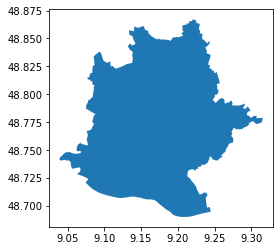

In [86]:
kreis_gdf.plot()

In [87]:
f0_kreis = f0.restrict_to_area(kreis_gdf)
f1_kreis = f1.restrict_to_area(kreis_gdf)

### number of routes

In [88]:
print("Number of routes {}:\t{}".format(dates[0],len(f0_kreis.routes)))
print("Number of routes {}:\t{}".format(dates[1],len(f1_kreis.routes)))

Number of routes 20220425:	178
Number of routes 20220620:	176


In [89]:
print("Number of agencies {}:\t{}".format(dates[0],len(f0_kreis.agency)))
print("Number of agencies {}:\t{}".format(dates[1],len(f1_kreis.agency)))

Number of agencies 20220425:	19
Number of agencies 20220620:	19


Agencies, die nur in einem Feed dabei sind?

In [90]:
display(f1_kreis.agency[~f1_kreis.agency.agency_name.isin(f0_kreis.agency.agency_name)])
fehlende_agency = f1_kreis.agency.agency_id[~f1_kreis.agency.agency_name.isin(f0_kreis.agency.agency_name)]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone


In [113]:
f1_kreis.agency

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
209,7872,DB-Nahverkehr,https://www.delfi.de,Europe/Berlin,NaN,NaN
300,7993,Stadtbahn,https://www.delfi.de,Europe/Berlin,NaN,NaN
301,7994,Zahnrad-/Seilbahn,https://www.delfi.de,Europe/Berlin,NaN,NaN
302,7996,Privatunternehmer-Bus (VVS),https://www.delfi.de,Europe/Berlin,NaN,NaN
303,7997,Nachtbus (SSB),https://www.delfi.de,Europe/Berlin,NaN,NaN
305,7999,Privatunternehmer-Bus (nicht VVS),https://www.delfi.de,Europe/Berlin,NaN,NaN
307,8001,Ruftaxi nicht entlang Linie,https://www.delfi.de,Europe/Berlin,NaN,NaN
312,8010,Privatunternehmer-Bus (RT),https://www.delfi.de,Europe/Berlin,NaN,NaN
358,8096,Regional-Busse RBS,https://www.delfi.de,Europe/Berlin,NaN,NaN
387,8147,RSV-GmbH Hogenmüller & Kull Co.,https://www.delfi.de,Europe/Berlin,NaN,NaN


Es sieht so aus, als ob vllt einiges nicht berichtet wurde!

In [92]:
display(f0_kreis.agency[~f0_kreis.agency.agency_name.isin(f1_kreis.agency.agency_name)])

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone


Wie sieht es aus mit den Agenturen, die es nicht gibt?

In [93]:
f1_kreis.routes[f1_kreis.routes.agency_id.isin(fehlende_agency)]

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color,route_desc


Welche agencies haben die meisten Routen?

In [94]:
f0_kreis.routes.agency_id.value_counts()

13477    40
7996     20
12681    20
7993     18
7872     17
10443    11
7997     10
12826     8
7999      7
8096      6
12827     5
8001      4
10444     3
13631     2
7994      2
13478     2
8010      1
10918     1
8147      1
Name: agency_id, dtype: int64

In [95]:
f1_kreis.routes.agency_id.value_counts()

13477    40
7996     20
12681    20
7993     18
7872     17
10443    11
7997     10
12826     8
7999      7
12827     5
8096      4
8001      4
10444     3
7994      2
13478     2
13631     2
10918     1
8010      1
8147      1
Name: agency_id, dtype: int64

## Daten

This doesn't tell us much, yet. How about trip stats for 2nd week in Nov?

In [96]:
weekofinterest = ["202211"+str(n).zfill(2) for n in range(10,17)]

In [97]:
%%capture --no-display
gk.compute_feed_stats(f0_kreis, gk.compute_trip_stats(f0_kreis), weekofinterest)

,num_stops,num_routes,num_trips,num_trip_starts,num_trip_ends,service_distance,service_duration,service_speed,peak_num_trips,peak_start_time,peak_end_time,date
0,3509,178,15290,15290,14673,317015.914776,9311.735000,34.044774,624,07:26:00,07:27:00,20221110
0,3509,173,14937,14937,14327,296555.828494,8974.168333,33.045494,597,07:23:00,07:24:00,20221111
0,3509,121,5161,5161,4751,157209.595507,3707.993333,42.397486,268,14:36:00,14:37:00,20221112
0,3509,113,3579,3579,3187,133899.484443,2848.665000,47.004293,214,12:36:00,12:38:00,20221113
0,3509,173,14905,14905,14311,296773.440540,8960.035000,33.121906,596,07:23:00,07:24:00,20221114
0,3509,173,14944,14944,14331,300239.246481,9014.601667,33.305881,598,07:23:00,07:24:00,20221115
0,3509,173,14962,14962,14349,301773.899651,9038.685000,33.386925,598,07:23:00,07:24:00,20221116


In [98]:
%%capture --no-display
gk.compute_feed_stats(f1_kreis, gk.compute_trip_stats(f1_kreis), weekofinterest)

,num_stops,num_routes,num_trips,num_trip_starts,num_trip_ends,service_distance,service_duration,service_speed,peak_num_trips,peak_start_time,peak_end_time,date
0,3493,176,15280,15280,14662,320825.125674,9307.868333,34.468163,619,07:26:00,07:27:00,20221110
0,3493,172,15014,15014,14402,300033.873035,9006.101667,33.314511,597,07:23:00,07:24:00,20221111
0,3493,122,5103,5103,4692,155161.257221,3649.343333,42.517583,258,14:36:00,14:37:00,20221112
0,3493,115,3586,3586,3192,134288.291436,2854.181667,47.049665,215,12:37:00,12:38:00,20221113
0,3493,171,14834,14834,14240,293955.354012,8860.568333,33.175677,584,07:23:00,07:24:00,20221114
0,3493,172,14870,14870,14258,296676.716482,8905.718333,33.313059,588,07:23:00,07:24:00,20221115
0,3493,172,15030,15030,14418,300326.776228,9022.518333,33.286358,595,07:23:00,07:24:00,20221116


In [99]:
%%capture --no-display
gk.compute_stop_stats(f0_kreis, weekofinterest)

,stop_id,num_routes,num_trips,start_time,end_time,max_headway,min_headway,mean_headway,date
0,000008000008,2.0,10.0,08:10:00,20:10:00,180.0,21.0,82.714286,20221110
1,000008100002,3.0,14.0,05:43:00,22:02:00,120.0,1.0,74.875000,20221110
2,000008503424,1.0,15.0,07:16:00,22:45:00,89.0,31.0,62.636364,20221110
3,000008700011,2.0,10.0,06:55:00,22:05:00,120.0,10.0,68.571429,20221110
4,ch:23005:6,2.0,3.0,05:46:00,22:00:00,NaN,NaN,NaN,20221110
...,...,...,...,...,...,...,...,...,...
3418,de:16055:8010366,1.0,1.0,29:37:00,29:37:00,NaN,NaN,NaN,20221116
3419,de:16056:8010097,2.0,16.0,07:55:00,28:47:00,121.0,5.0,63.100000,20221116
3420,de:16067:8010136,2.0,4.0,18:44:00,29:03:00,NaN,NaN,NaN,20221116
3421,de:16073:8010309,1.0,2.0,09:34:00,20:23:00,NaN,NaN,NaN,20221116


In [100]:
gk.compute_stop_stats(f1_kreis, weekofinterest)

,stop_id,num_routes,num_trips,start_time,end_time,max_headway,min_headway,mean_headway,date
0,000008000008,2.0,10.0,08:10:00,20:10:00,180.0,21.0,82.714286,20221110
1,000008100002,3.0,14.0,05:43:00,22:02:00,120.0,1.0,74.875000,20221110
2,000008503424,1.0,15.0,07:16:00,22:45:00,89.0,31.0,62.636364,20221110
3,000008700011,2.0,10.0,06:55:00,22:05:00,120.0,10.0,68.571429,20221110
4,ch:23005:6,2.0,3.0,05:46:00,22:00:00,NaN,NaN,NaN,20221110
...,...,...,...,...,...,...,...,...,...
3403,de:16055:8010366,1.0,1.0,29:37:00,29:37:00,NaN,NaN,NaN,20221116
3404,de:16063:8010097,2.0,16.0,07:55:00,28:47:00,121.0,5.0,63.100000,20221116
3405,de:16067:8010136,2.0,4.0,18:44:00,29:03:00,NaN,NaN,NaN,20221116
3406,de:16073:8010309,1.0,2.0,09:34:00,20:23:00,NaN,NaN,NaN,20221116


### Stops

In [101]:
f0_stops = f0_kreis.stops.copy()
f0_stops = gpd.GeoDataFrame(f0_stops, 
                            geometry=[Point(p) for p in zip(f0_stops.stop_lon, f0_stops.stop_lat)],
                            crs="epsg:4326"
                           ).clip(kreis_gdf)

<AxesSubplot:>

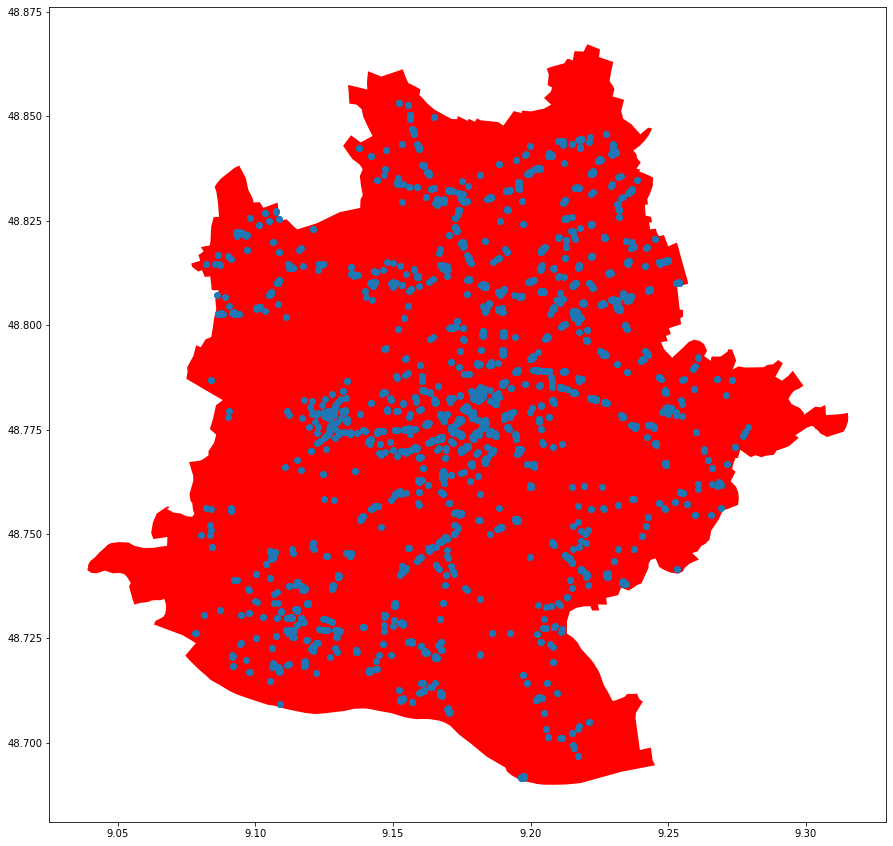

In [102]:
fig, ax = plt.subplots (figsize = (15,15))
kreis_gdf.plot(ax=ax, color='red')
f0_stops.plot(ax=ax)

In [103]:
f1_stops = f1_kreis.stops.copy()
f1_stops = gpd.GeoDataFrame(f1_stops, 
                            geometry=[Point(p) for p in zip(f1_stops.stop_lon, f1_stops.stop_lat)],
                            crs="epsg:4326"
                           ).clip(kreis_gdf)

In [104]:
f0_stops_unique = f0_stops.drop_duplicates("geometry")

In [105]:
f1_stops_unique = f1_stops.drop_duplicates("geometry")

In [106]:
point_counts_0 = gpd.sjoin(f0_stops_unique[["stop_id","geometry"]], f0_stops, op='intersects'
         ).groupby("stop_id_left"
                  ).agg({"stop_id_right":"count",
                         "geometry":"first", 
                         "stop_name":"first"
                        })

/home/jupyter-maita.schade/.conda/envs/oev-atlas/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [107]:
point_counts_1 = gpd.sjoin(f1_stops_unique[["stop_id","geometry"]], f1_stops, op='intersects'
         ).groupby("stop_id_left"
                  ).agg({"stop_id_right":"count",
                         "geometry":"first", 
                         "stop_name":"first"
                        })

/home/jupyter-maita.schade/.conda/envs/oev-atlas/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [108]:
point_counts_0

,stop_id_right,geometry,stop_name
stop_id_left,,,
000010000504,1,POINT (9.11482 48.73172),Stuttgart Fauststraße
000010000602,1,POINT (9.11908 48.73329),Stuttgart Vaihingen Viadukt
000010000603,1,POINT (9.11884 48.73348),Stuttgart Vaihingen Viadukt
000010000804,1,POINT (9.12816 48.73736),Stuttgart Engelboldstraße
000010000805,2,POINT (9.12790 48.73737),Stuttgart Engelboldstraße
...,...,...,...
de:08111:97:0:4,2,POINT (9.15324 48.84337),Stuttgart Marco-Polo-Weg
de:08116:2103:3:A,4,POINT (9.19704 48.69157),Flughafen/Messe
de:08116:2125:0:4,2,POINT (9.10883 48.70925),Leinfelden Schmellbachtal


Wie viele Haltestellen sind mehrmals vertreten--und wie oft? (z.B. Berlin Hbf, mit seinen verschiedenen Bahnsteigen)

In [138]:
display(point_counts_0.stop_id_right.value_counts().sort_index())
print(point_counts_0.stop_id_right.sum())

1     2433
2      413
3       10
4       24
5        2
6        1
16       1
Name: stop_id_right, dtype: int64

3417


Welche haben die meisten Haltestellen?

In [139]:
point_counts_0[point_counts_0.stop_id_right>2].sort_values('stop_id_right',ascending=False)

,stop_id_right,geometry,stop_name
stop_id_left,,,
de:08111:6115:3:6,16,POINT (9.18321 48.78475),Stuttgart Hauptbahnhof (oben)
de:08111:6002:5:4,6,POINT (9.11140 48.72689),Stuttgart Vaihingen
de:08111:6056:4:3,5,POINT (9.17188 48.77483),Stuttgart Stadtmitte
000010613005,5,POINT (9.21830 48.74141),Stuttgart Schemppstraße
000010655503,4,POINT (9.20229 48.71038),Stuttgart Plieningen
000010620603,4,POINT (9.15600 48.77536),Stuttgart Schwab-/Bebelstraße
de:08111:6213:3:4,4,POINT (9.13410 48.77406),Stuttgart Lindpaintnerstraße
de:08111:6210:2:3,4,POINT (9.12679 48.77919),Stuttgart Eltinger Straße
de:08111:6112:6:5,4,POINT (9.18107 48.78322),Stuttgart Hauptbf (Arnulf-Klett-Platz)


Mehr Information zu den Haltestellen, die mehrmals auftauchen:

In [167]:
pd.set_option('display.max_rows', 128)
f0_multistops = f0_stops[f0_stops.geometry.isin(point_counts_0[point_counts_0.stop_id_right>1].geometry)].sort_values('stop_lat')
display(f0_multistops.head(100))

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code,level_id,geometry
121745,de:08116:2103:3:1,NaN,Flughafen/Messe,SAB,48.691520,9.196729,0,NaN,0,1,2.0,POINT (9.19673 48.69152)
508950,000010210306,NaN,Flughafen/Messe,SAB,48.691520,9.196729,2,de:08116:2103,0,1,2.0,POINT (9.19673 48.69152)
508960,000010210316,NaN,Flughafen/Messe,SAB,48.691573,9.197041,2,de:08116:2103,0,2,2.0,POINT (9.19704 48.69157)
508968,000010210324,NaN,Flughafen/Messe,SAB,48.691573,9.197041,2,de:08116:2103,0,A,2.0,POINT (9.19704 48.69157)
121755,de:08116:2103:3:2,NaN,Flughafen/Messe,SAB,48.691573,9.197041,0,NaN,0,2,2.0,POINT (9.19704 48.69157)
121763,de:08116:2103:3:A,NaN,Flughafen/Messe,SAB,48.691573,9.197041,0,NaN,0,A,2.0,POINT (9.19704 48.69157)
508961,000010210317,NaN,Flughafen/Messe,SAB,48.691635,9.197368,2,de:08116:2103,0,3,2.0,POINT (9.19737 48.69163)
121756,de:08116:2103:3:3,NaN,Flughafen/Messe,SAB,48.691635,9.197368,0,NaN,0,3,2.0,POINT (9.19737 48.69163)
121757,de:08116:2103:3:4,NaN,Flughafen/Messe,SAB,48.691707,9.197735,0,NaN,0,4,2.0,POINT (9.19773 48.69171)
508962,000010210318,NaN,Flughafen/Messe,SAB,48.691707,9.197735,2,de:08116:2103,0,4,2.0,POINT (9.19773 48.69171)


Und in dem anderen Datensatz?

In [140]:
display(point_counts_1.stop_id_right.value_counts().sort_index())
print(point_counts_1.stop_id_right.sum())

1     2444
2      408
3       10
4       24
5        2
6        1
16       1
Name: stop_id_right, dtype: int64

3418


### Abfahrten...

Pick one--z.B. Steinhaldenfeld

In [176]:
stop_name = "Steinhaldenfeld"

In [177]:
these_stops = f0_multistops[f0_multistops.stop_name.str.find(stop_name)>0]

In [184]:
these_stops

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code,level_id,geometry
508982,000010249006,NaN,Stuttgart Steinhaldenfeld,Bus,48.827545,9.231924,2,de:08111:2490,0,4,2.0,POINT (9.23192 48.82755)
221434,de:08111:2490:2:3,NaN,Stuttgart Steinhaldenfeld,Bus,48.827545,9.231924,0,NaN,0,3,2.0,POINT (9.23192 48.82755)
508981,000010249005,NaN,Stuttgart Steinhaldenfeld,Bus,48.827545,9.231924,2,de:08111:2490,0,3,2.0,POINT (9.23192 48.82755)
221435,de:08111:2490:2:4,NaN,Stuttgart Steinhaldenfeld,Bus,48.827545,9.231924,0,NaN,0,4,2.0,POINT (9.23192 48.82755)


In [178]:
[len(f0_kreis.stop_times[f0_kreis.stop_times.stop_id==stop_id]) for stop_id in these_stops.stop_id] 

[0, 35, 0, 38]

In [181]:
nv_per_stop_df = pd.read_csv('../../data/interim/20220425_fahrplaene_gesamtdeutschland_gtfs.nv.nstops.csv')

In [185]:
stop_counts = nv_per_stop_df[nv_per_stop_df['stop_name'].str.contains(stop_name)]
stop_counts

,Unnamed: 0,stop_id,n,stop_name,parent_station,stop_lat,stop_lon,location_type,n_day
212324,212324,de:08111:2490:1:1,37825.0,Stuttgart Steinhaldenfeld,de:08111:2490,48.828382,9.231587,0,155.658436
212325,212325,de:08111:2490:1:2,37825.0,Stuttgart Steinhaldenfeld,de:08111:2490,48.828373,9.231723,0,155.658436
212326,212326,de:08111:2490:2:3,5740.0,Stuttgart Steinhaldenfeld,NaN,48.827545,9.231924,0,23.621399
212327,212327,de:08111:2490:2:4,6597.0,Stuttgart Steinhaldenfeld,NaN,48.827545,9.231924,0,27.148148
350631,350631,de:08111:2490_G,77790.0,Stuttgart Steinhaldenfeld,NaN,48.828535,9.231682,0,320.123457


<AxesSubplot:>

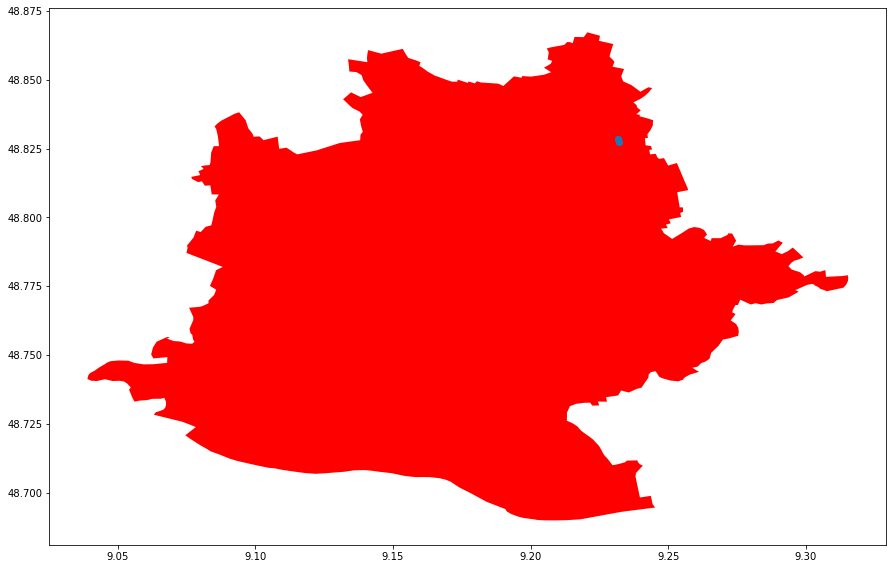

In [190]:
fig, ax = plt.subplots (figsize = (15,15))
kreis_gdf.plot(ax=ax, color='red')
gpd.GeoDataFrame(stop_counts, geometry=[Point(p) for p in zip(stop_counts.stop_lon, stop_counts.stop_lat)]).plot(ax=ax)


In [191]:
f0_stops[f0_stops.stop_id.isin(stop_counts.stop_id)]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code,level_id,geometry
221433,de:08111:2490:1:2,NaN,Stuttgart Steinhaldenfeld,Stadtbahn,48.828373,9.231723,0,de:08111:2490,0,2,5.0,POINT (9.23172 48.82837)
221432,de:08111:2490:1:1,NaN,Stuttgart Steinhaldenfeld,Stadtbahn,48.828382,9.231587,0,de:08111:2490,0,1,5.0,POINT (9.23159 48.82838)
366289,de:08111:2490_G,NaN,Stuttgart Steinhaldenfeld,NaN,48.828535,9.231682,0,NaN,0,NaN,NaN,POINT (9.23168 48.82854)
221434,de:08111:2490:2:3,NaN,Stuttgart Steinhaldenfeld,Bus,48.827545,9.231924,0,NaN,0,3,2.0,POINT (9.23192 48.82755)
221435,de:08111:2490:2:4,NaN,Stuttgart Steinhaldenfeld,Bus,48.827545,9.231924,0,NaN,0,4,2.0,POINT (9.23192 48.82755)


In [198]:
f0_stops[f0_stops.stop_id.str.contains("_G") & f0_stops.stop_name.str.contains("Stuttgart")]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code,level_id,geometry
366181,de:08111:6270_G_G,NaN,Stuttgart Mühlhausen,NaN,48.840986,9.229830,0,NaN,0,NaN,NaN,POINT (9.22983 48.84099)
366363,de:08111:6270_G,NaN,Stuttgart Mühlhausen,NaN,48.841316,9.230652,0,NaN,0,NaN,NaN,POINT (9.23065 48.84132)
383492,de:08111:288_G_G,NaN,Stuttgart Suttnerstraße,NaN,48.840454,9.206546,0,NaN,0,NaN,NaN,POINT (9.20655 48.84045)
366290,de:08111:288_G,NaN,Stuttgart Suttnerstraße,NaN,48.840662,9.206629,0,NaN,0,NaN,NaN,POINT (9.20663 48.84066)
366365,de:08111:6287_G,NaN,Stuttgart Freiberg,NaN,48.844108,9.210624,0,NaN,0,NaN,NaN,POINT (9.21062 48.84411)
...,...,...,...,...,...,...,...,...,...,...,...,...
357531,de:08111:2586_G,NaN,Stuttgart EnBW City,NaN,48.711725,9.167469,0,NaN,0,NaN,NaN,POINT (9.16747 48.71173)
366204,de:08111:2584_G,NaN,Stuttgart Europaplatz,NaN,48.712176,9.160283,0,NaN,0,NaN,NaN,POINT (9.16028 48.71218)
366267,de:08111:6171_G,NaN,Stuttgart Möhringen Freibad,NaN,48.716923,9.141436,0,NaN,0,NaN,NaN,POINT (9.14144 48.71692)
386062,de:08111:2037:0:3_G,NaN,Stuttgart Bernhäuser Straße,NaN,48.698772,9.215583,0,NaN,0,NaN,NaN,POINT (9.21558 48.69877)


In [195]:
stop_name = "Dürrlewang"
stop_counts = nv_per_stop_df[nv_per_stop_df['stop_name'].str.contains(stop_name)]
f0_stops[f0_stops.stop_id.isin(stop_counts.stop_id)]

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,platform_code,level_id,geometry
221637,de:08111:2613:0:4,NaN,Stuttgart Dürrlewang,Bus,48.718470,9.117862,0,NaN,0,4,2.0,POINT (9.11786 48.71847)
221636,de:08111:2613:0:3,NaN,Stuttgart Dürrlewang,Bus,48.718695,9.117876,0,NaN,0,3,2.0,POINT (9.11788 48.71869)
221635,de:08111:2613:1:1,NaN,Stuttgart Dürrlewang,Stadtbahn,48.719019,9.118054,0,de:08111:2613,0,1,5.0,POINT (9.11805 48.71902)
366217,de:08111:2613_G,NaN,Stuttgart Dürrlewang,NaN,48.719027,9.118053,0,NaN,0,NaN,NaN,POINT (9.11805 48.71903)
221638,de:08111:2613:0:5,NaN,Stuttgart Dürrlewang,Bus,48.719334,9.117756,0,NaN,0,5,2.0,POINT (9.11776 48.71933)


In [196]:
stop_counts

,Unnamed: 0,stop_id,n,stop_name,parent_station,stop_lat,stop_lon,location_type,n_day
212519,212519,de:08111:2613:1:1,49052.0,Stuttgart Dürrlewang,de:08111:2613,48.719019,9.118054,0,201.860082
212520,212520,de:08111:2613:0:3,20368.0,Stuttgart Dürrlewang,NaN,48.718695,9.117876,0,83.818930
212521,212521,de:08111:2613:0:4,20287.0,Stuttgart Dürrlewang,NaN,48.718470,9.117862,0,83.485597
212522,212522,de:08111:2613:0:5,857.0,Stuttgart Dürrlewang,NaN,48.719334,9.117756,0,3.526749
350559,350559,de:08111:2613_G,50560.0,Stuttgart Dürrlewang,NaN,48.719027,9.118053,0,208.065844


Gibt es die in ganz BaWü?

In [201]:
stop_counts = nv_per_stop_df[nv_per_stop_df['stop_name'].str.contains("Heidelberg") & nv_per_stop_df.stop_id.str.contains('_G')]

In [202]:
stop_counts

,Unnamed: 0,stop_id,n,stop_name,parent_station,stop_lat,stop_lon,location_type,n_day
145828,145828,de:08221:1166_G,20.0,"Heidelberg, Altstadt",NaN,49.415237,8.720887,0,0.082305
414184,414184,de:08125:9242:0:1_G,10438.0,Neckarsulm Heidelberger Straße,NaN,49.204023,9.242452,0,42.954733
